<a href="https://colab.research.google.com/github/sthowells/FacialRecognition/blob/main/deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

# Mount Drive

In [2]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

#Navigate to /mydrive/yolov4
%cd /mydrive/DeepFace/

# list the contents of /mydrive
!ls

/
Mounted at /content/gdrive
/content/gdrive/My Drive/DeepFace
deepface.ipynb	deepface_test.mp4  Jenny.jpg  NoEmotion.jpg  Smile.jpg


# Imports

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import time
from os import path
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

# import the opencv library
import cv2

from deepface.basemodels import VGGFace, OpenFace, Facenet, Facenet512, FbDeepFace, DeepID, DlibWrapper, ArcFace, Boosting
from deepface.extendedmodels import Age, Gender, Race, Emotion
from deepface.commons import functions, realtime, distance as dst

import tensorflow as tf
tf_version = int(tf.__version__.split(".")[0])
if tf_version == 2:
	import logging
	tf.get_logger().setLevel(logging.ERROR)

from deepface import DeepFace




Directory  /root /.deepface created
Directory  /root /.deepface/weights created


# Single-Person Detection: Age, Gender, Race, Emotion

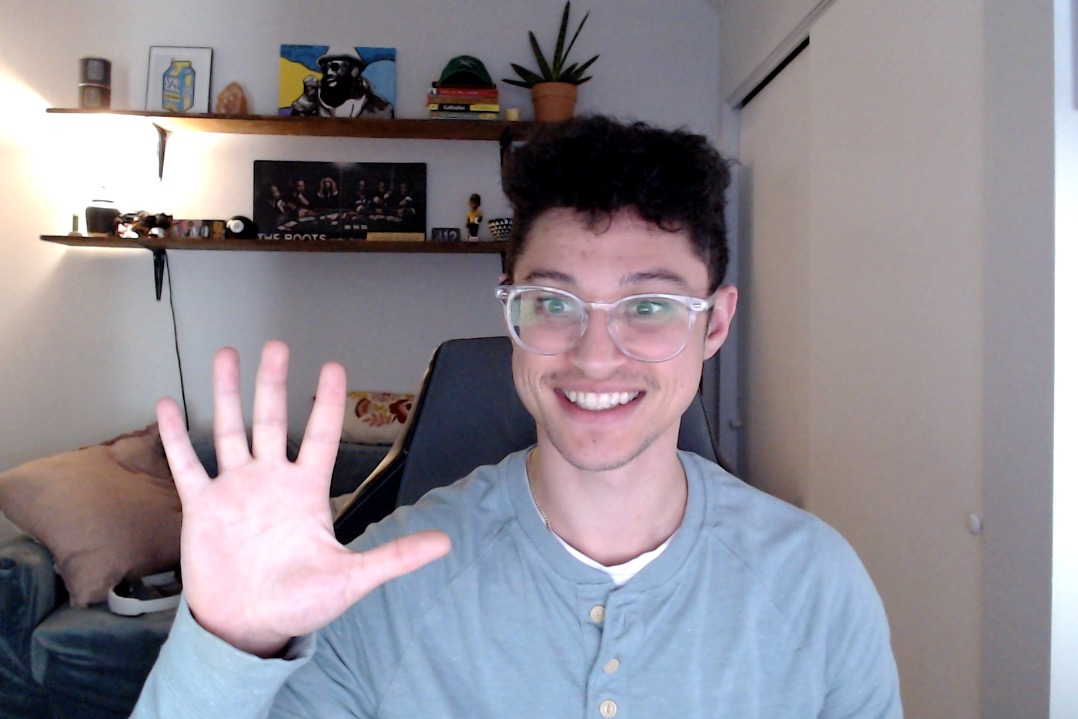

In [52]:
import cv2
from google.colab.patches import cv2_imshow 
image = cv2.imread('Smile.jpg')

cv2_imshow(image)

In [26]:
def draw_text(
    img,
    *,
    text,
    uv_top_left,
    color=(255, 255, 255),
    fontScale=0.5,
    thickness=1,
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    outline_color=(0, 0, 0),
    line_spacing=1.5,):
    """
    Draws multiline with an outline.
    """
    assert isinstance(text, str)

    uv_top_left = np.array(uv_top_left, dtype=float)
    assert uv_top_left.shape == (2,)

    for line in text.splitlines():
        (w, h), _ = cv2.getTextSize(
            text=line,
            fontFace=fontFace,
            fontScale=fontScale,
            thickness=thickness,
        )
        uv_bottom_left_i = uv_top_left + [0, h]
        org = tuple(uv_bottom_left_i.astype(int))

        if outline_color is not None:
            cv2.putText(
                img,
                text=line,
                org=org,
                fontFace=fontFace,
                fontScale=fontScale,
                color=outline_color,
                thickness=thickness * 3,
                lineType=cv2.LINE_AA,
            )
        cv2.putText(
            img,
            text=line,
            org=org,
            fontFace=fontFace,
            fontScale=fontScale,
            color=color,
            thickness=thickness,
            lineType=cv2.LINE_AA,
        )

        uv_top_left += [0, h * line_spacing]

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


{'x': 487, 'y': 216, 'w': 232, 'h': 232} 33  years old  white   happy   Man


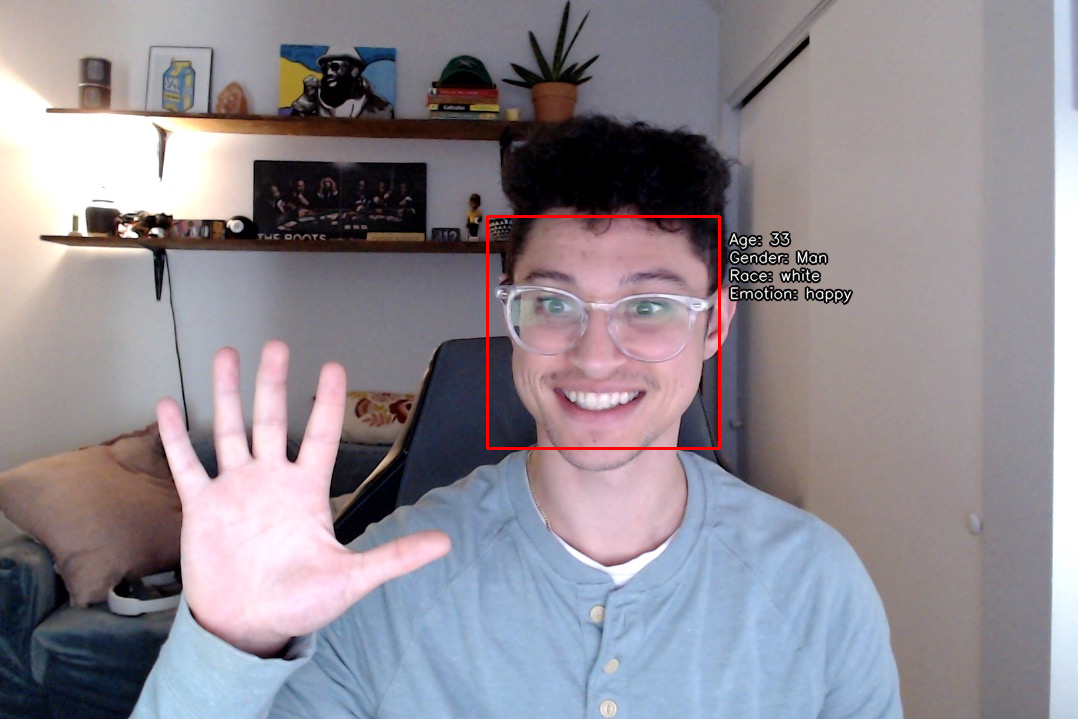

In [53]:
obj = DeepFace.analyze(img_path = image, actions = ['age', 'gender', 'race', 'emotion'], )
print(obj["region"],obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

anno = image.copy()

# get values from obj region dictionary
locals().update(obj["region"])
text1 = f'Age: {obj["age"]} \nGender: {obj["gender"]} \nRace: {obj["dominant_race"]} \nEmotion: {obj["dominant_emotion"]}'

# draw bounding box from region coordinates
anno = cv2.rectangle(anno, (x,y), (x+w,y+h), (0,0,255), 2)

# draw text box
draw_text(img=anno, text=text1, uv_top_left=(x+w+10,y+(h-y)+0))

# show annotated image
cv2_imshow(anno)